In [13]:
import os
import pickle

import numpy as np
import torch as tc
import tqdm
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [14]:
def plotting_signal(s, y, p=None, name="none"):
    assert len(s) == len(y)
    # between = np.arange(s.min(), s.max()+1)
    plt.plot(range(len(s)), s, color="black")
    if y:
        between = np.arange(0, s.max() + 1)
        for idx, val in enumerate(y):
            if val == 1:
                plt.plot([idx] * len(between), between, color="red", alpha=0.7)
    if p:
        between = np.arange(s.min() - 1, 0)
        for idx, val in enumerate(p):
            if val == 1:
                plt.plot([idx] * len(between), between, color="blue", alpha=0.6)
    # plt.title("Noise Level=%s" % name)
    plt.show()
    # plt.savefig("figures/%s.pdf" % name)
    plt.clf()
    

In [15]:
class DataReader(tc.utils.data.Dataset):
    def __init__(self, fpath):
        tc.utils.data.Dataset.__init__(self)
        self._data = np.load(fpath)

    def __len__(self):
        return len(self._data)

    def __getitem__(self, idx):
        x = self._data[idx][:1000]
        x = (x - x.mean()) / x.std()
        y = [0] * len(x)
        for idx in find_peaks(x, distance=50)[0].tolist():
            y[idx] = 1
        plotting_signal(x, y)
        return (tc.tensor(x, dtype=tc.float32), tc.tensor(y, dtype=tc.int64))

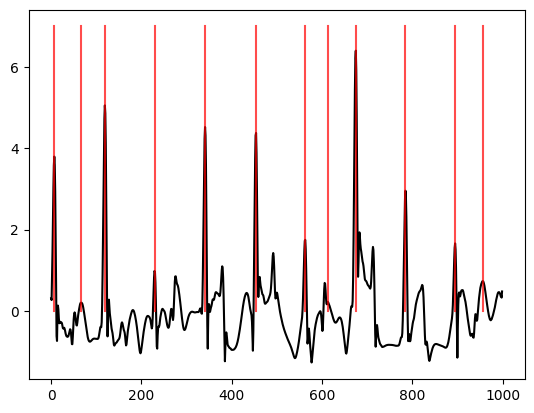

<Figure size 640x480 with 0 Axes>

In [43]:
test2 = DataReader(
            # "../datasets/testing/extracted_envelope_data_test.npy"
            # "../datasets/real_BSG_data/envelope_data/extracted_envelope_data_test.npy"
            "../datasets/testing/extracted_envelope_data_10k.npy"
        )
test2_iter = iter(test2)
t = next(test2_iter)

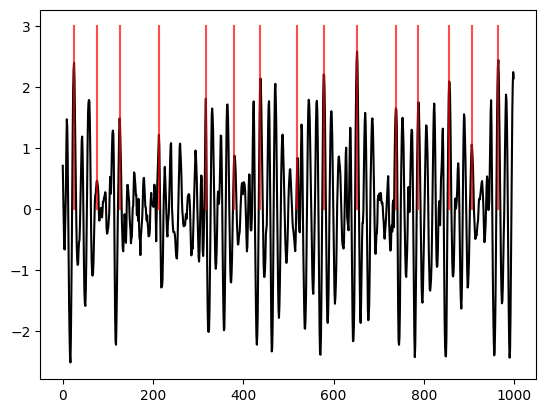

<Figure size 640x480 with 0 Axes>

In [16]:
t

(tensor([-1.7310, -1.6475, -1.5878, -1.4545, -1.3183, -1.0355, -0.6071, -0.1457,
          0.2901,  0.6781,  0.9884,  1.2164,  1.3539,  1.4085,  1.3949,  1.3352,
          1.2631,  1.2056,  1.1912,  1.2284,  1.3137,  1.4266,  1.5350,  1.6094,
          1.6215,  1.5595,  1.4204,  1.2152,  0.9609,  0.6751,  0.3744,  0.0706,
         -0.2142, -0.4439, -0.5663, -0.5487, -0.3963, -0.1521,  0.1117,  0.3359,
          0.4875,  0.5613,  0.5727,  0.5485,  0.5193,  0.5068,  0.5218,  0.5606,
          0.6130,  0.6663,  0.7122,  0.7477,  0.7741,  0.7954,  0.8138,  0.8303,
          0.8404,  0.8376,  0.8130,  0.7592,  0.6727,  0.5531,  0.4063,  0.2395,
          0.0636, -0.1121, -0.2799, -0.4363, -0.5833, -0.7260, -0.8734, -1.0323,
         -1.2081, -1.3997, -1.5544, -1.6112, -1.5667, -1.4251, -1.2424, -1.0831,
         -0.9558, -0.8652, -0.8142, -0.8036, -0.8273, -0.8720, -0.9129, -0.9231,
         -0.8841, -0.7937, -0.6658, -0.5203, -0.3727, -0.2276, -0.0842,  0.0606,
          0.2077,  0.3570,  

In [ ]:
plotting_signal(x[0].cpu().numpy(), y.cpu()[0].tolist(), p, "Real_BSG_Test" + noise)

In [7]:
noisy = "00"
print("Noise Level: %s" % noisy)
train = DataReader("../datasets/stable_noise%s/simu_10k.npy" % noisy)

Noise Level: 00


In [13]:
train_iter = iter(train)

In [25]:
t = next(train_iter)

In [26]:
type(t[0])

torch.Tensor

In [24]:
t[0]

tensor([-1.7378e-01,  1.0978e-01,  2.9868e+00,  4.2688e+00, -3.0073e+00,
         1.5167e+00, -1.4397e+00,  6.6556e-01, -8.4049e-01, -1.1698e-01,
        -1.8805e-01, -1.8700e-01, -1.8032e-01, -1.7539e-01, -1.7382e-01,
        -1.7541e-01, -1.7773e-01, -1.7873e-01, -1.7775e-01, -1.7622e-01,
        -1.7559e-01, -1.7640e-01, -1.7756e-01, -1.7791e-01, -1.3348e-01,
         6.6586e-01,  2.0416e+00, -8.1062e-01, -1.2172e-01, -1.9104e-01,
        -1.5814e-01, -2.5814e-01, -6.4884e-02, -2.5487e-01, -1.1829e-01,
        -2.0062e-01, -1.6728e-01, -1.7744e-01, -1.7631e-01, -1.7705e-01,
        -1.7787e-01, -1.7740e-01, -1.7644e-01, -1.7588e-01, -1.7646e-01,
        -1.7763e-01, -1.0533e-01,  1.7284e+00,  6.7918e+00, -4.1610e-01,
        -1.4772e+00,  1.1547e+00, -8.9572e-01,  1.8386e-01, -3.2554e-01,
        -1.9330e-01, -1.6513e-01, -1.6745e-01, -1.7429e-01, -1.7927e-01,
        -1.8044e-01, -1.7813e-01, -1.7553e-01, -1.7479e-01, -1.7628e-01,
        -1.7801e-01, -1.7842e-01, -1.7723e-01, -1.7

In [27]:
t[1]

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
import numpy as np
data = np.load('/Users/vatsalthakkar/Downloads/BedotProject/datasets/stable_noise00/simu_10k.npy')

In [33]:
(data[1].shape)

(1006,)